In [1]:
#Imports
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
#pullinng raw data from un site
#r contains the all the data
url = ('http://web.archive.org/web/20110514112442/http://unstats.un.org/unsd/demographic/products/socind/education.htm')
r= requests.get(url)

In [3]:
#intializing soup and saving desired items in thelist from the soup
soup=BeautifulSoup(r.content, 'lxml')
#for row in soup('table'): #testing
    #print(row)
thelist = soup.findAll('tr', attrs=('class', 'tcont'))

In [4]:
#scrapData a dataframe with desired columns
scrapData=pd.DataFrame(columns=['country', 'year', 'avg', 'male', 'female'])

In [5]:
scrapData.head()

,country,year,avg,male,female


In [34]:
#selecting only the rows which contains data
#printing the info in seperate columns
rows=soup.findAll('tr')[18:-11]
for row in rows:
    col=row.findAll('td')
    #print (col[0].text, int(col[1].text), int(col[4].text), int(col[7].text), int(col[10].text)) 

In [7]:
#Finally putting data into dataframe

k=0
for row in rows:
    col=row.findAll('td')
    scrapData.loc[k] = (col[0].text, int(col[1].text), int(col[4].text), int(col[7].text), int(col[10].text))  #works fine
    k+=1
    

In [8]:
scrapData.head()

,country,year,avg,male,female
0,Afghanistan,2004.0,8.0,11.0,5.0
1,Albania,2004.0,11.0,11.0,11.0
2,Algeria,2005.0,13.0,13.0,13.0
3,Andorra,2008.0,11.0,11.0,12.0
4,Anguilla,2008.0,11.0,11.0,11.0


In [9]:
scrapData.tail()

,country,year,avg,male,female
178,Venezuela (Bolivarian Republic of),2008.0,14.0,13.0,15.0
179,Viet Nam,2001.0,10.0,11.0,10.0
180,Yemen,2005.0,9.0,11.0,7.0
181,Zambia,2000.0,7.0,8.0,7.0
182,Zimbabwe,2003.0,9.0,9.0,9.0


In [10]:
#To save into sqlite
#pandas.DataFrame(full_data_list).to_sql('test', con, flavor='sqlite',
                #schema=None, if_exists='replace', index=True,
                #index_label=None, chunksize=None, dtype=None)

In [11]:
scrapData.to_sql('school_years', con, flavor='sqlite', schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

In [11]:
import sqlite3 as lite
con = lite.connect('C:\\sqlite3\\education.db')
cur = con.cursor()
#con.close()  #database closed not to reenter additional datas

In [2]:
#creating a table
#with con:
    #cur.execute('CREATE TABLE gdp(country_name TEXT, _1999 REAL, _2000 REAL, _2001 REAL, _2002 REAL, _2003 REAL, _2004 REAL, _2005 REAL, _2006 REAL, _2007 REAL, _2008 REAL, _2009 REAL, _2010 REAL);' )

In [ ]:
#cur.execute('INSERT INTO gdp (country_name, _1999, _2000, _2001, _2002, _2003, _2004, _2005, _2006, _2007, _2008, _2009, _2010) VALUES ("' + line[0] + '","' + '","'.join(line[42:-5]) + '");')
        #print (("' + line[0] + '", "' + ''", "'.join(line[42:-5]) + '"))
        #with con
        #print (line [0])
        #print (line[42:-5])
        #print("lines above did execute")
        #print (line[43:-6])

In [17]:
#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning) 

import csv

#with open('ny.gdp.mktp.cd_Indicator_en_csv_v2/ny.gdp.mktp.cd_Indicator_en_csv_v2.csv','rU') as inputFile:
#C:\\Users\\Mnsh\\Documents\\GitHub\\Thinkful_downloads\\GDP
with open('C:\\Users\\Mnsh\\Documents\\GitHub\\Thinkful_downloads\\GDP.csv','rU') as inputFile: 
    print(next(inputFile))
    print(next(inputFile))
    print(next(inputFile))
    print(next(inputFile))
    header = (next(inputFile))  #table heading is at 5th row
    inputReader = csv.reader(inputFile)
    for line in inputReader:
        with con:        
            cur.execute('INSERT INTO gdp (country_name, _1999, _2000, _2001, _2002, _2003, _2004, _2005, _2006, _2007, _2008, _2009, _2010) VALUES ("' + line[0] + '","' + '","'.join(line[43:-6]) + '");')
con.close()     

'\nimport csv\n\n#with open(\'ny.gdp.mktp.cd_Indicator_en_csv_v2/ny.gdp.mktp.cd_Indicator_en_csv_v2.csv\',\'rU\') as inputFile:\n#C:\\Users\\Mnsh\\Documents\\GitHub\\Thinkful_downloads\\GDP\nwith open(\'C:\\Users\\Mnsh\\Documents\\GitHub\\Thinkful_downloads\\GDP.csv\',\'rU\') as inputFile: \n    print(next(inputFile))\n    print(next(inputFile))\n    print(next(inputFile))\n    print(next(inputFile))\n    header = (next(inputFile))  #table heading is at 5th row\n    inputReader = csv.reader(inputFile)\n    for line in inputReader:\n        with con:        \n            cur.execute(\'INSERT INTO gdp (country_name, _1999, _2000, _2001, _2002, _2003, _2004, _2005, _2006, _2007, _2008, _2009, _2010) VALUES ("\' + line[0] + \'","\' + \'","\'.join(line[43:-6]) + \'");\')\ncon.close()   '

In [18]:
#reading from sql dbase
import pandas as pd
sql_gdp= "SELECT * FROM gdp"
sql_edu= "SELECT * FROM school_years"

gdpData = pd.read_sql(sql_gdp, con)
gdpData.head()


,country_name,_1999,_2000,_2001,_2002,_2003,_2004,_2005,_2006,_2007,_2008,_2009,_2010
0,Aruba,1.7228e+09,1.87345e+09,1.92026e+09,1.94109e+09,2.0213e+09,2.22828e+09,2.33101e+09,2.42147e+09,2.62373e+09,2.79196e+09,2.49893e+09,2.4677e+09
1,Andorra,1.23984e+09,1.40169e+09,1.484e+09,1.71756e+09,2.37384e+09,2.91691e+09,3.24813e+09,3.53645e+09,4.01079e+09,4.00135e+09,3.64986e+09,3.34632e+09
2,Afghanistan,,,2.46167e+09,4.12882e+09,4.58365e+09,5.28546e+09,6.27508e+09,7.0576e+09,9.84384e+09,1.01905e+10,1.24869e+10,1.59368e+10
3,Angola,6.15294e+09,9.12963e+09,8.93606e+09,1.52856e+10,1.78127e+10,2.3552e+10,3.69709e+10,5.2381e+10,6.52665e+10,8.85386e+10,7.31579e+10,8.33695e+10
4,Albania,3.41476e+09,3.63204e+09,4.06076e+09,4.43508e+09,5.74695e+09,7.31487e+09,8.15855e+09,8.99264e+09,1.0701e+10,1.28814e+10,1.20442e+10,1.1927e+10


In [19]:
#selecting gdp of 2008 and cleaning it to use it in analysis
gdpData ['2008']= gdpData['_2008'].apply(pd.to_numeric, errors='coerce')  #works fine 

#dataframe selecting country and gdp on 2008
gdpData_new=gdpData[['country_name', '2008']]
gdpData_new.head()

,country_name,2008
0,Aruba,2.791961e+09
1,Andorra,4.001349e+09
2,Afghanistan,1.019053e+10
3,Angola,8.853861e+10
4,Albania,1.288135e+10


In [20]:
#df=df.rename(columns = {'two':'new_name'})
#renaming the country_name as country to match with other table so that pandas df tools can be used
gdpData_new=gdpData_new.rename(columns = {'country_name':'country'})
gdpData_new.head()

,country,2008
0,Aruba,2.791961e+09
1,Andorra,4.001349e+09
2,Afghanistan,1.019053e+10
3,Angola,8.853861e+10
4,Albania,1.288135e+10


In [23]:
#pd.merge(df_new, df_n, on='subject_id')
#merging 2 tables at country with same name and dropping countries which does not have gdp or schooling details
edu_gdp=pd.merge(scrapData, gdpData_new, on='country' )
edu_gdp.dropna(inplace=True)
edu_gdp.head()

,country,year,avg,male,female,2008
0,Afghanistan,2004.0,8.0,11.0,5.0,1.019053e+10
1,Albania,2004.0,11.0,11.0,11.0,1.288135e+10
2,Algeria,2005.0,13.0,13.0,13.0,1.710007e+11
3,Andorra,2008.0,11.0,11.0,12.0,4.001349e+09
4,Antigua and Barbuda,2000.0,14.0,12.0,16.0,1.347350e+09


In [25]:
import numpy as np
#adding a const column and gdp_log column
edu_gdp['const'] = 1
edu_gdp['const']=edu_gdp['const'].astype(float)
edu_gdp['gdp_log']=np.log(edu_gdp['2008'])
#edu_gdp['avg']#(dtype)
edu_gdp.head()

,country,year,avg,male,female,2008,const,gdp_log
0,Afghanistan,2004.0,8.0,11.0,5.0,1.019053e+10,1.0,23.044725
1,Albania,2004.0,11.0,11.0,11.0,1.288135e+10,1.0,23.279047
2,Algeria,2005.0,13.0,13.0,13.0,1.710007e+11,1.0,25.864933
3,Andorra,2008.0,11.0,11.0,12.0,4.001349e+09,1.0,22.109897
4,Antigua and Barbuda,2000.0,14.0,12.0,16.0,1.347350e+09,1.0,21.021405


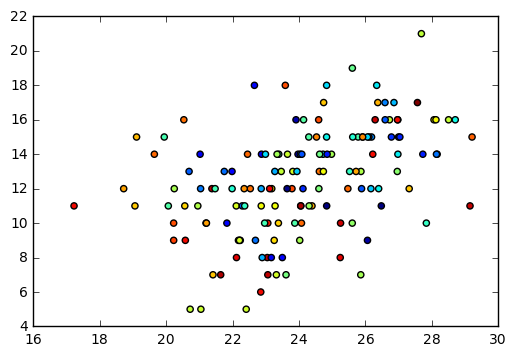

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
colors = np.random.rand(len(edu_gdp))
plt.scatter(edu_gdp['gdp_log'], edu_gdp['avg'], c=colors)

In [30]:
ind_vars=['const', 'avg']


In [31]:
#using regular values not taking log
import statsmodels.api as sm
model = sm.OLS(edu_gdp['2008'], edu_gdp[ind_vars])
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                   2008   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     8.626
Date:                Thu, 12 Jan 2017   Prob (F-statistic):            0.00386
Time:                        03:42:29   Log-Likelihood:                -4209.7
No. Observations:                 147   AIC:                             8423.
Df Residuals:                     145   BIC:                             8429.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -3.981e+11    2.3e+11     -1.732      0.0

In [32]:
'''ind_vars=['const', 'avg']
import statsmodels.api as sm
logit = sm.Logit(edu_gdp['2008'], edu_gdp[ind_vars])
result= logit.fit()
result
error - ValueError: endog must be in the unit interval
Meaning: dependant variable ie gdp should be expressed in terms of probality ie between 0 and 1'''
#fillting ols with log values of gdp
model = sm.OLS(edu_gdp['gdp_log'], edu_gdp[ind_vars])
results = model.fit()
print (results.summary())


                            OLS Regression Results                            
Dep. Variable:                gdp_log   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     35.06
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           2.22e-08
Time:                        03:42:34   Log-Likelihood:                -321.07
No. Observations:                 147   AIC:                             646.1
Df Residuals:                     145   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         19.7326      0.746     26.437      0.0

Summary:
Apparently there is poor correlation between average schooling (male and female) and gdp as r-squared is only 0.19.
One explanation could be single reading of GDP and schooling is taken without considering the incremental effects. GDP could lead by few years and vice versa in real scenario. From scatter plot the gdp and schooling are spread all over with wide band some are significantly away from central region.
Cross sectional evaluation of gdp and schooling correlates only poorly but longitudinal studies might result in better correlation.

In [33]:
gdp = edu_gdp['gdp_log'].map(lambda x: float(x))
school_years = edu_gdp['avg'].map(lambda x: int(x))

y = np.matrix(gdp).transpose()
x = np.matrix(school_years).transpose()

X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     35.06
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           2.22e-08
Time:                        03:42:44   Log-Likelihood:                -321.07
No. Observations:                 147   AIC:                             646.1
Df Residuals:                     145   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         19.7326      0.746     26.437      0.0